In [23]:
from L1_DataMining.DataMining import read_data

import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

For this work we will use the graph from the previous lab.

In [24]:
connections = read_data('data/connections')

G = nx.from_pandas_edgelist(connections, source='member', target='friend').to_undirected()
print(f"Nodes: {len(G.nodes)}\nEdges: {len(G.edges)}")

communities = nx_comm.louvain_communities(G)

Nodes: 1480
Edges: 1235


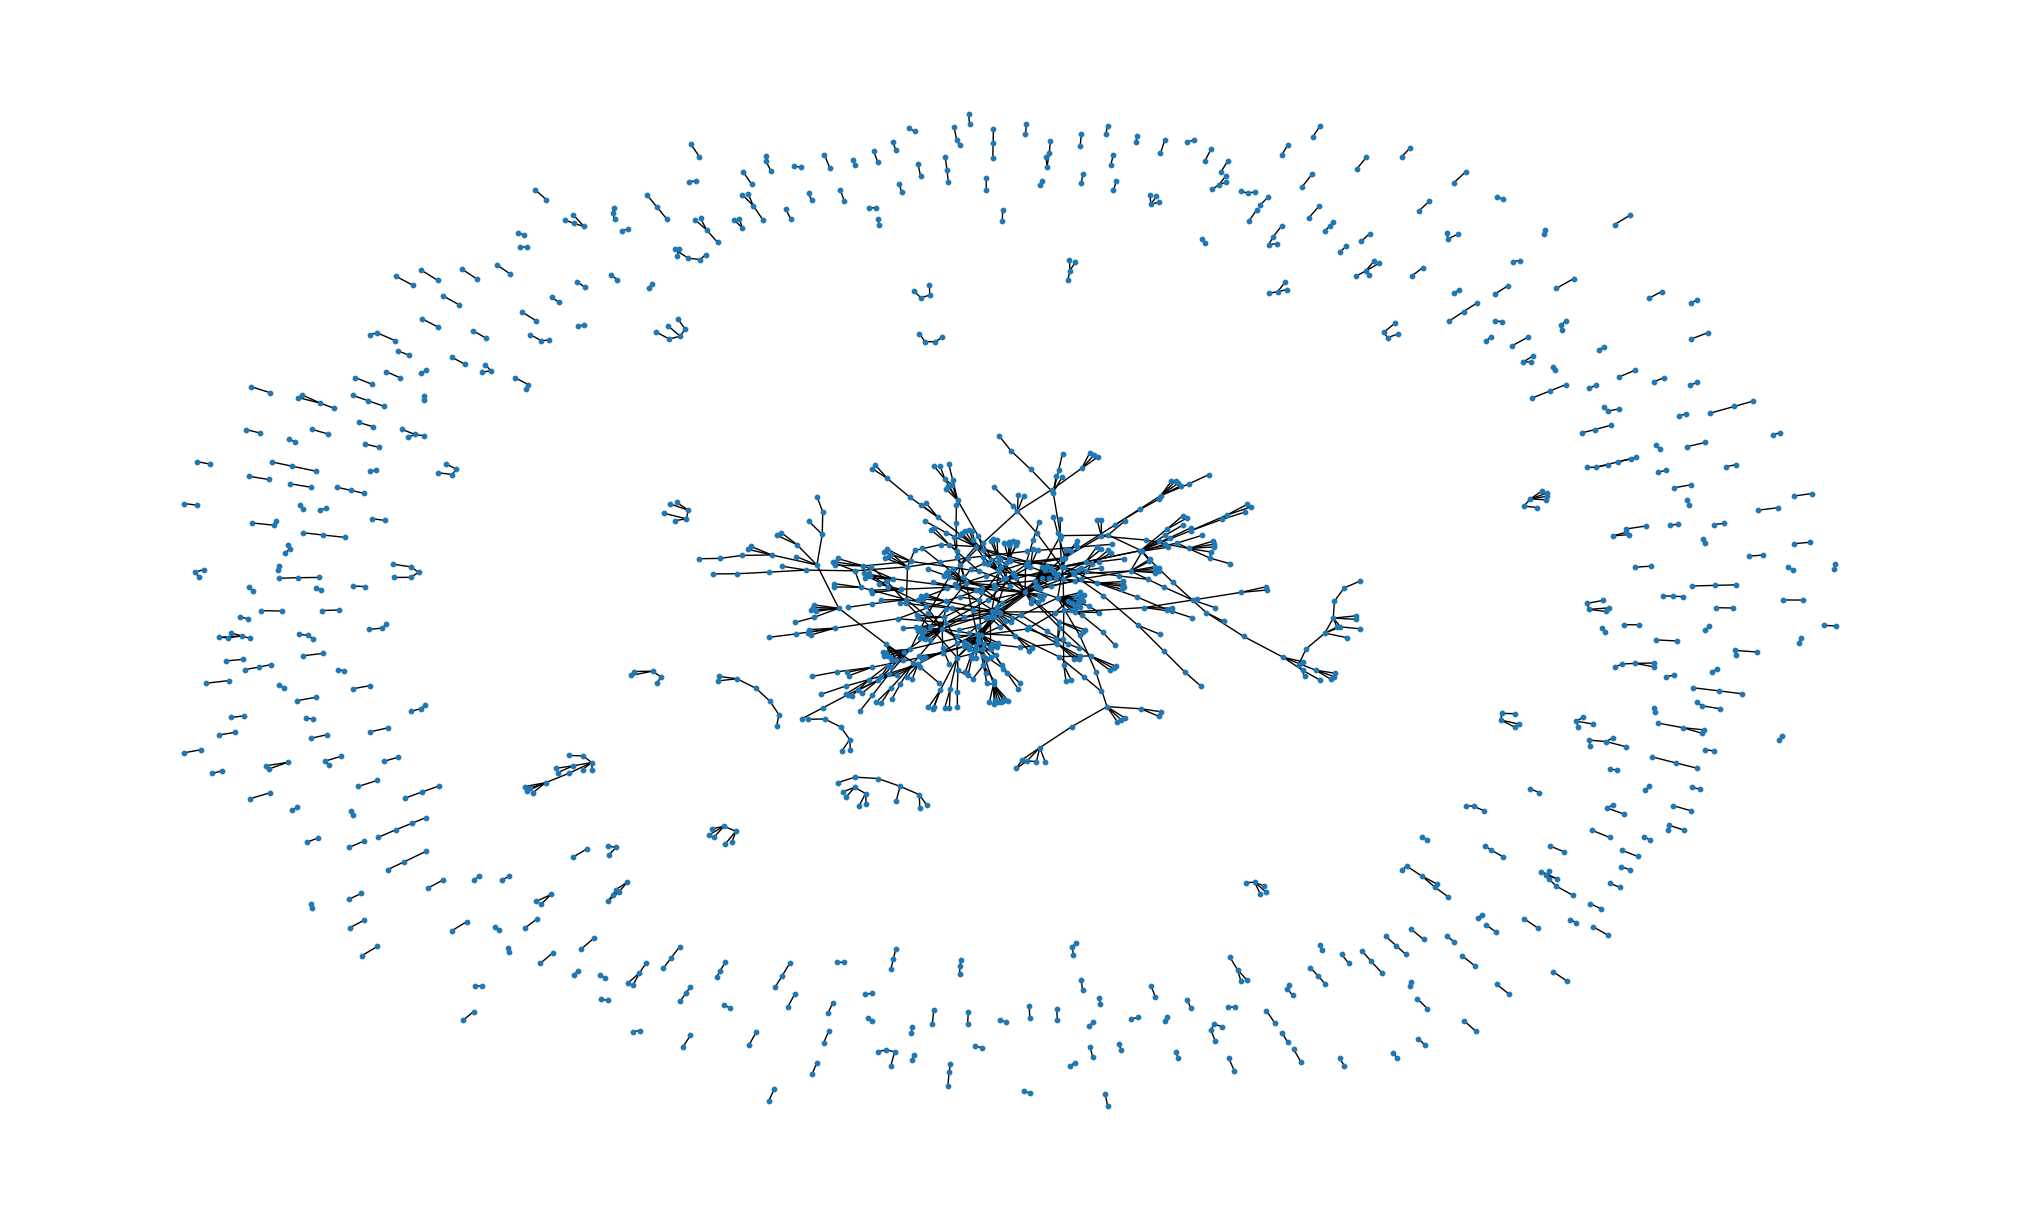

In [25]:
plt.figure(figsize=(20, 12))
nx.draw(G, node_size=10)

## 1. Betweenness centrality

Let's find the most authoritative users

In [26]:
authoritative = sorted(list(nx.betweenness_centrality(G).items()), key=lambda i: i[1], reverse=True)
print(*authoritative[:10], sep='\n')

(1102391, 0.038360532981348415)
(309349767, 0.03223476780361265)
(2769126, 0.026442592803334466)
(1088007, 0.02528889348901485)
(48852572, 0.01944494505317917)
(21425049, 0.016280281627478063)
(7609, 0.01610169560066223)
(75981681, 0.01563793505963176)
(307729224, 0.015161838333672979)
(19217771, 0.014868017236233164)


## 2. Graph density

In [27]:
nx.density(G)

0.0011284103576192825

## 3. The connectivity of a graph

In [35]:
nx.is_connected(G)

False

In [36]:
print("Components count:", len([_ for _ in nx.connected_components(G)]))

Components count: 360


The result, in principle, can be seen in the chart above.

## 4. Degrees

In [37]:
degrees = [d[1] for d in nx.degree(G)]
print('Max:', max(degrees))
print('Min:', min(degrees))
print('Mean:', sum(degrees) / len(degrees))

Max: 27
Min: 1
Mean: 1.6689189189189189


## Modularity

In [38]:
nx.community.modularity(G, communities)

0.9325702765165831